# FDA_HW4
#### E94041220 郭濯瑀

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random

### feature 描述

* Attribute 1 : Unique user id 
* Attribute 2 : Average ratings on churches 
* Attribute 3 : Average ratings on resorts 
* Attribute 4 : Average ratings on beaches 
* Attribute 5 : Average ratings on parks 
* Attribute 6 : Average ratings on theatres 
* Attribute 7 : Average ratings on museums 
* Attribute 8 : Average ratings on malls 
* Attribute 9 : Average ratings on zoo 
* Attribute 10 : Average ratings on restaurants 
* Attribute 11 : Average ratings on pubs/bars 
* Attribute 12 : Average ratings on local services 
* Attribute 13 : Average ratings on burger/pizza shops 
* Attribute 14 : Average ratings on hotels/other lodgings 
* Attribute 15 : Average ratings on juice bars 
* Attribute 16 : Average ratings on art galleries 
* Attribute 17 : Average ratings on dance clubs 
* Attribute 18 : Average ratings on swimming pools 
* Attribute 19 : Average ratings on gyms 
* Attribute 20 : Average ratings on bakeries 
* Attribute 21 : Average ratings on beauty & spas 
* Attribute 22 : Average ratings on cafes 
* Attribute 23 : Average ratings on view points 
* Attribute 24 : Average ratings on monuments 
* Attribute 25 : Average ratings on gardens

In [2]:
data = pd.read_csv('google_review_ratings.csv')
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


# preprocess dataset

In [3]:
data = data.drop('User', axis=1 )
data = data.drop('Unnamed: 25', axis=1)

new_colnames = {'Category 1' : 'churches', 'Category 2' : 'resorts', 'Category 3' : 'beaches', 'Category 4' : 'parks',
            'Category 5' : 'theatres', 'Category 6' : 'museums', 'Category 7' : 'malls', 'Category 8' : 'zoo',
            'Category 9' : 'restaurants', 'Category 10' : 'pubs', 'Category 11' : 'local services', 
            'Category 12' : 'pizza_shop', 'Category 13' : 'hotel lodgings', 
            'Category 14' : 'juice bars', 'Category 15' : 'galleries', 'Category 16' : 'dance clubs',
            'Category 17' : 'pools', 'Category 18' : 'gyms', 'Category 19' : 'bakeries', 'Category 20' : 'spas',
            'Category 21' : 'cafes', 'Category 22' : 'view points', 'Category 23' : 'monuments', 'Category 24' : 'gardens'}

data = data.rename(index=str, columns=new_colnames)
data.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs,...,galleries,dance clubs,pools,gyms,bakeries,spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


## 目標:預測 local services的平均評分

In [4]:
data.shape

(5456, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5456 entries, 0 to 5455
Data columns (total 24 columns):
churches          5456 non-null float64
resorts           5456 non-null float64
beaches           5456 non-null float64
parks             5456 non-null float64
theatres          5456 non-null float64
museums           5456 non-null float64
malls             5456 non-null float64
zoo               5456 non-null float64
restaurants       5456 non-null float64
pubs              5456 non-null float64
local services    5456 non-null object
pizza_shop        5455 non-null float64
hotel lodgings    5456 non-null float64
juice bars        5456 non-null float64
galleries         5456 non-null float64
dance clubs       5456 non-null float64
pools             5456 non-null float64
gyms              5456 non-null float64
bakeries          5456 non-null float64
spas              5456 non-null float64
cafes             5456 non-null float64
view points       5456 non-null float64
monuments         5

In [6]:
data['local services'] = pd.to_numeric(data['local services'], errors='coerce')

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
churches          5454 non-null float64
resorts           5454 non-null float64
beaches           5454 non-null float64
parks             5454 non-null float64
theatres          5454 non-null float64
museums           5454 non-null float64
malls             5454 non-null float64
zoo               5454 non-null float64
restaurants       5454 non-null float64
pubs              5454 non-null float64
local services    5454 non-null float64
pizza_shop        5454 non-null float64
hotel lodgings    5454 non-null float64
juice bars        5454 non-null float64
galleries         5454 non-null float64
dance clubs       5454 non-null float64
pools             5454 non-null float64
gyms              5454 non-null float64
bakeries          5454 non-null float64
spas              5454 non-null float64
cafes             5454 non-null float64
view points       5454 non-null float64
monuments         

In [8]:
data_train = data[:5000]
data_test = data[5000:]

In [9]:
x_train = data_train.drop(['local services'], axis=1)
y_train = data_train['local services']
y_train = np.array(y_train, dtype=int)
x_test = data_test.drop(['local services'], axis=1)
y_test = data_test['local services']
y_test = np.array(y_test, dtype=int)


In [10]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
evaluate(clf, x_train, y_train, x_test, y_test)

Train accuracy: 0.716
Test accuracy: 0.7731277533039648


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## NN

In [12]:
from sklearn import model_selection, preprocessing
x_train_NN = preprocessing.normalize(x_train)
x_test_NN = preprocessing.normalize(x_test)
x_train_NN = x_train_NN*2-1
x_test_NN = x_test_NN*2-1

In [13]:
hidden_units = 50    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.1           # regularization - how much we penalize large parameter values
learning_rate = 1  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

In [14]:
from keras import models, layers, optimizers, regularizers
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=23,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.
Epoch 1/50
5000/5000 [==============================] - 0s 67us/step - loss: -18.1300 - acc: 0.4012
Epoch 2/50
5000/5000 [==============================] - 0s 26us/step - loss: -18.2891 - acc: 0.4040
Epoch 3/50
5000/5000 [==============================] - 0s 26us/step - loss: -18.2891 - acc: 0.4040
Epoch 4/50
5000/5000 [==============================] - 0s 24us/step - loss: -18.2891 - acc: 0.4040
Epoch 5/50
5000/5000 [==============================] - 0s 24us/step - loss: -18.2891 - acc: 0.4040
Epoch 6/50
5000/5000 [==============================] - 0s 23us/step - loss: -18.2891 - acc: 0.4040
Epoch 7/50
5000/5000 [==============================] - 0s 25us/step - loss: -18.2891 - acc: 0.4040
Epoch 8/50
5000/5000 [==============================] - 0s 24us/step - loss: -18.2891 - acc: 0.4040
Epoch 9/50
5000/5000 [==============================] - 0s 24us/step - loss: -18.2891 - acc: 0.4040
Epoch 10/50
5000/5000 [=============================

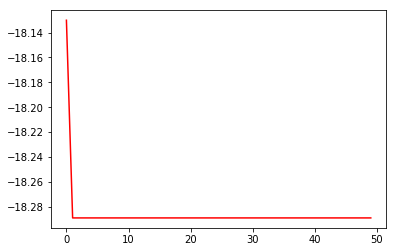

In [15]:
history = model.fit(x_train_NN, y_train, epochs=50, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train_NN, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test_NN, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

準確率不高

### 加深層數

Epoch 1/10
5000/5000 [==============================] - 0s 73us/step - loss: -18.1787 - acc: 0.4040
Epoch 2/10
5000/5000 [==============================] - 0s 33us/step - loss: -18.2891 - acc: 0.4040
Epoch 3/10
5000/5000 [==============================] - 0s 27us/step - loss: -18.2891 - acc: 0.4040
Epoch 4/10
5000/5000 [==============================] - 0s 27us/step - loss: -18.2891 - acc: 0.4040
Epoch 5/10
5000/5000 [==============================] - 0s 30us/step - loss: -18.2891 - acc: 0.4040
Epoch 6/10
5000/5000 [==============================] - 0s 27us/step - loss: -18.2891 - acc: 0.4040
Epoch 7/10
5000/5000 [==============================] - 0s 26us/step - loss: -18.2891 - acc: 0.4040
Epoch 8/10
5000/5000 [==============================] - 0s 25us/step - loss: -18.2891 - acc: 0.4040
Epoch 9/10
5000/5000 [==============================] - 0s 26us/step - loss: -18.2891 - acc: 0.4040
Epoch 10/10
454/454 [==============================] - 0s 20us/step
Training accuracy: 0.404
Testing

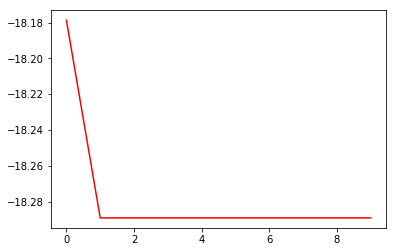

In [16]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=23,
                       units=64, 
                       activation=activation))

model.add(layers.Dense(input_dim=64,
                       units=32, 
                       activation=activation))


# add the output layer
model.add(layers.Dense(input_dim=40,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])



# train the parameters
history = model.fit(x_train_NN, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train_NN, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test_NN, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

準確率依舊沒有提高

因此決定挑幾個跟local service看起來較有關西的feature來做訓練

In [17]:
x_train = x_train.drop(['churches','beaches','parks','juice bars','dance clubs','gyms','bakeries','view points','monuments', 'gardens'], axis=1)
x_test = x_test.drop(['churches','beaches','parks','juice bars','dance clubs','gyms','bakeries','view points','monuments', 'gardens'], axis=1)

In [18]:
x_train.head()

,resorts,theatres,museums,malls,zoo,restaurants,pubs,pizza_shop,hotel lodgings,galleries,pools,spas,cafes
0,0.0,5.0,2.92,5.0,2.35,2.33,2.64,1.69,1.7,1.74,0.5,0.0,0.0
1,0.0,5.0,2.92,5.0,2.64,2.33,2.65,1.69,1.7,1.74,0.5,0.0,0.0
2,0.0,5.0,2.92,5.0,2.64,2.33,2.64,1.69,1.7,1.74,0.5,0.0,0.0
3,0.5,5.0,2.92,5.0,2.35,2.33,2.64,1.69,1.7,1.74,0.5,0.0,0.0
4,0.0,5.0,2.92,5.0,2.64,2.33,2.64,1.69,1.7,1.74,0.5,0.0,0.0


In [19]:
clf = LogisticRegression().fit(x_train, y_train)
evaluate(clf, x_train, y_train, x_test, y_test)

Train accuracy: 0.6814
Test accuracy: 0.7797356828193832


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Epoch 1/10
5000/5000 [==============================] - 0s 85us/step - loss: -18.1522 - acc: 0.4014
Epoch 2/10
5000/5000 [==============================] - 0s 30us/step - loss: -18.2891 - acc: 0.4040
Epoch 3/10
5000/5000 [==============================] - 0s 27us/step - loss: -18.2891 - acc: 0.4040
Epoch 4/10
5000/5000 [==============================] - 0s 28us/step - loss: -18.2891 - acc: 0.4040
Epoch 5/10
5000/5000 [==============================] - 0s 27us/step - loss: -18.2891 - acc: 0.4040
Epoch 6/10
5000/5000 [==============================] - 0s 30us/step - loss: -18.2891 - acc: 0.4040
Epoch 7/10
5000/5000 [==============================] - 0s 28us/step - loss: -18.2891 - acc: 0.4040
Epoch 8/10
5000/5000 [==============================] - 0s 26us/step - loss: -18.2891 - acc: 0.4040
Epoch 9/10
5000/5000 [==============================] - 0s 28us/step - loss: -18.2891 - acc: 0.4040
Epoch 10/10
454/454 [==============================] - 0s 15us/step
Training accuracy: 0.404
Testing

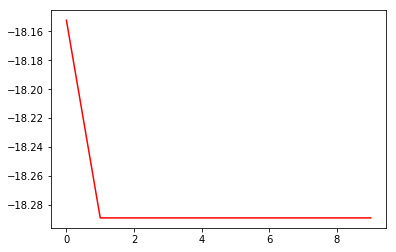

In [20]:
x_train_NN = preprocessing.normalize(x_train)
x_test_NN = preprocessing.normalize(x_test)
x_train_NN = x_train_NN*2-1
x_test_NN = x_test_NN*2-1

hidden_units = 50    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.1           # regularization - how much we penalize large parameter values
learning_rate = 1  # how big our steps are in gradient descent
epochs = 50          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update

# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=13,
                       units=64, 
                       activation=activation))

model.add(layers.Dense(input_dim=64,
                       units=32, 
                       activation=activation))


# add the output layer
model.add(layers.Dense(input_dim=40,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])



# train the parameters
history = model.fit(x_train_NN, y_train, epochs=10, batch_size=batch_size)

# evaluate accuracy
train_acc = model.evaluate(x_train_NN, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test_NN, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()